In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [62]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


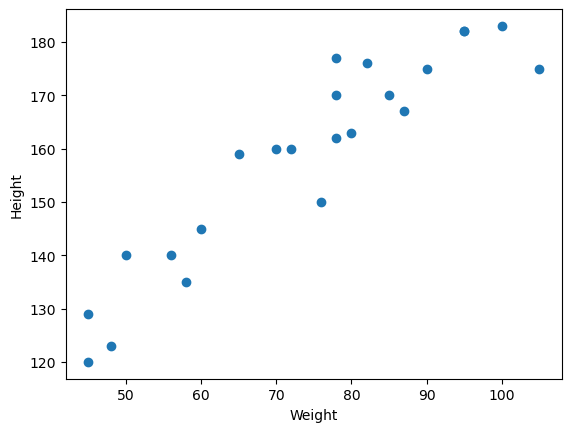

In [63]:
#use the scatter plot to see the dataset
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()


In [64]:
#correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


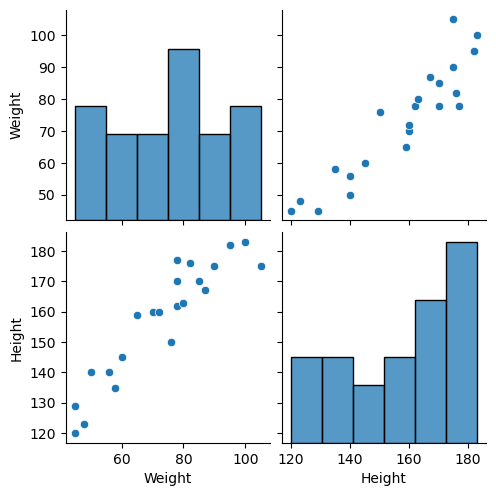

In [65]:
#also use seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

Start


In [66]:
#divide the independent and dependent feature
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [67]:
#divided the independent and dependent features

x = df[['Weight']] #The independent variable must be in df or in 2 dimensional array
y = df['Height'] # the dependent feature must be in series (because you have 23 input and 23 output 


In [68]:
x_series = df['Weight']

In [69]:
## Train Test split
## we use the library sklearn

from sklearn.model_selection import train_test_split 

In [70]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

In [71]:
X_train.shape

(17, 1)

In [72]:
##standardilzation 
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [74]:
x_test = scaler.transform(x_test)

apply simple linear regression

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
regression = LinearRegression(n_jobs=-1)

In [77]:
regression.fit(X_train, y_train) 

LinearRegression(n_jobs=-1)

In [78]:
print("Coefficent or slope:",regression.coef_)


Coefficent or slope: [17.2982057]


In [79]:
print("Intercept :",regression.intercept_)

Intercept : 156.47058823529412


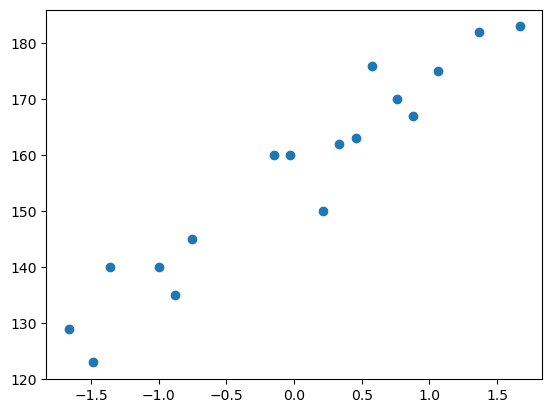

In [80]:
## plot training data best fit line 
plt.scatter(X_train,y_train)
plt.show()

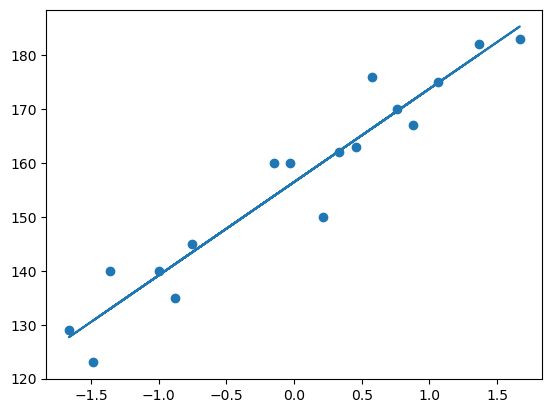

In [81]:
## plot training data best fit line 
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train)) #best-fit line which have coef and intercept both 
plt.show()

predicition of test data 
1. predicted height output = intercept +coef_(weights)
2. y_pred_test = 156.40 + 17.29(x)

In [82]:
#prediction of test data
y_pred = regression.predict(x_test)

Performance Metrices

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [84]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


114.84069295228699
9.665125886795005
10.716374991212605


R SQUARE & Adj R Square

In [86]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Accuracy : ",score)

Accuracy :  0.7360826717981276


In [88]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476595

In [91]:
#OLS Model 
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.predict(x_test)

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [93]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 26 Jun 2025   Prob (F-statistic):                       0.664
Time:                        23:08:52   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
##predicted the new data
regression.predict([[72]]) #because we use standardization that's why big output

array([1401.94139895])

In [97]:
regression.predict(scaler.transform([[72]]))

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])